# Data Set :-https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data =pd.read_csv("D:Datas/Telco Customer Churn dataset/Telco-Customer-Churn.csv")
pd.set_option('display.max_columns',None)
data.head(5) # Show The Data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Check Null Values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# view the data set in exal for better explore the data
# replace " " with 0 for change into float
data['TotalCharges']=data['TotalCharges'].replace(" ","0") 
data['TotalCharges']=data['TotalCharges'].astype(float) # Change datatype

In [6]:
# Check Duplicate data
data.duplicated().sum()

0

In [7]:
# also check for column which contain unique values
data['customerID'].duplicated().sum()

0

In [8]:
# Convert value of Senior Citizen like other columns
def conv(value):
    if value  == 1:
        return "Yes"
    else:
        return "No"
    
data['SeniorCitizen'] = data['SeniorCitizen'].apply(conv)
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


# Customers Count By Churn

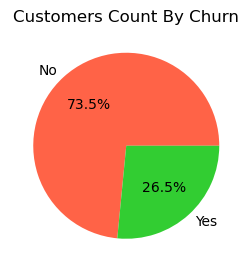

In [9]:
plt.figure(figsize=(3,4))
churn_counts = data['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['#FF6347', '#32CD32'])
plt.title("Customers Count By Churn")
plt.show()

# Churn By Senior Citizen

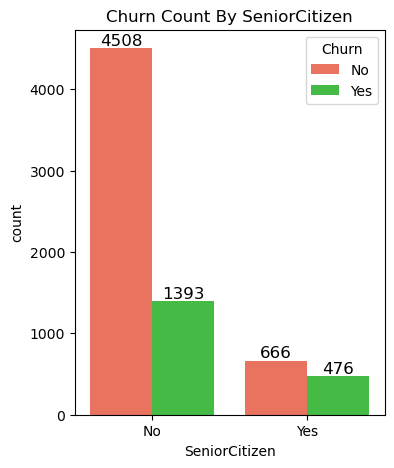

In [10]:
plt.figure(figsize=(4,5))
ax=sns.countplot(x='SeniorCitizen',data=data,hue="Churn", palette=['#FF6347', '#32CD32'])
for p in ax.patches:
    count = int(p.get_height())  
    ax.annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.title("Churn Count By SeniorCitizen")
plt.show()

# Churn Count By Tenure

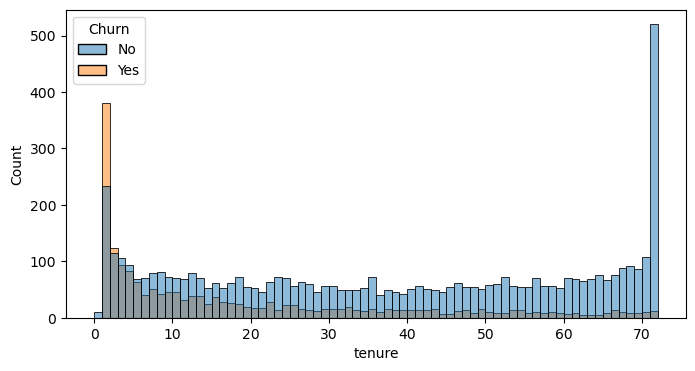

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(x="tenure",data=data,bins=72,hue="Churn")
plt.show()

people who have used services for a long time have stayed and people who have used our services 1 or 2 months have churned 

# Churn Count By Contract

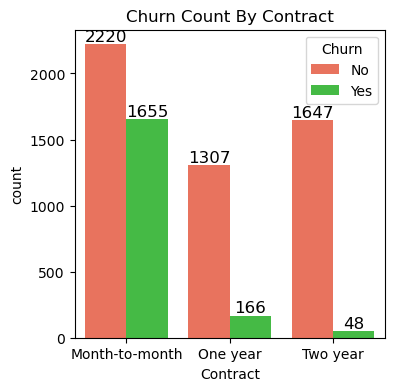

In [12]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Contract',data=data,hue="Churn", palette=['#FF6347', '#32CD32'])
for p in ax.patches:
    count = int(p.get_height())  
    ax.annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.title("Churn Count By Contract")
plt.show()

people who have month to month contract are likely to churn then from those who have 1 or 2 year of contract

# Churn Count By Diffrent Services

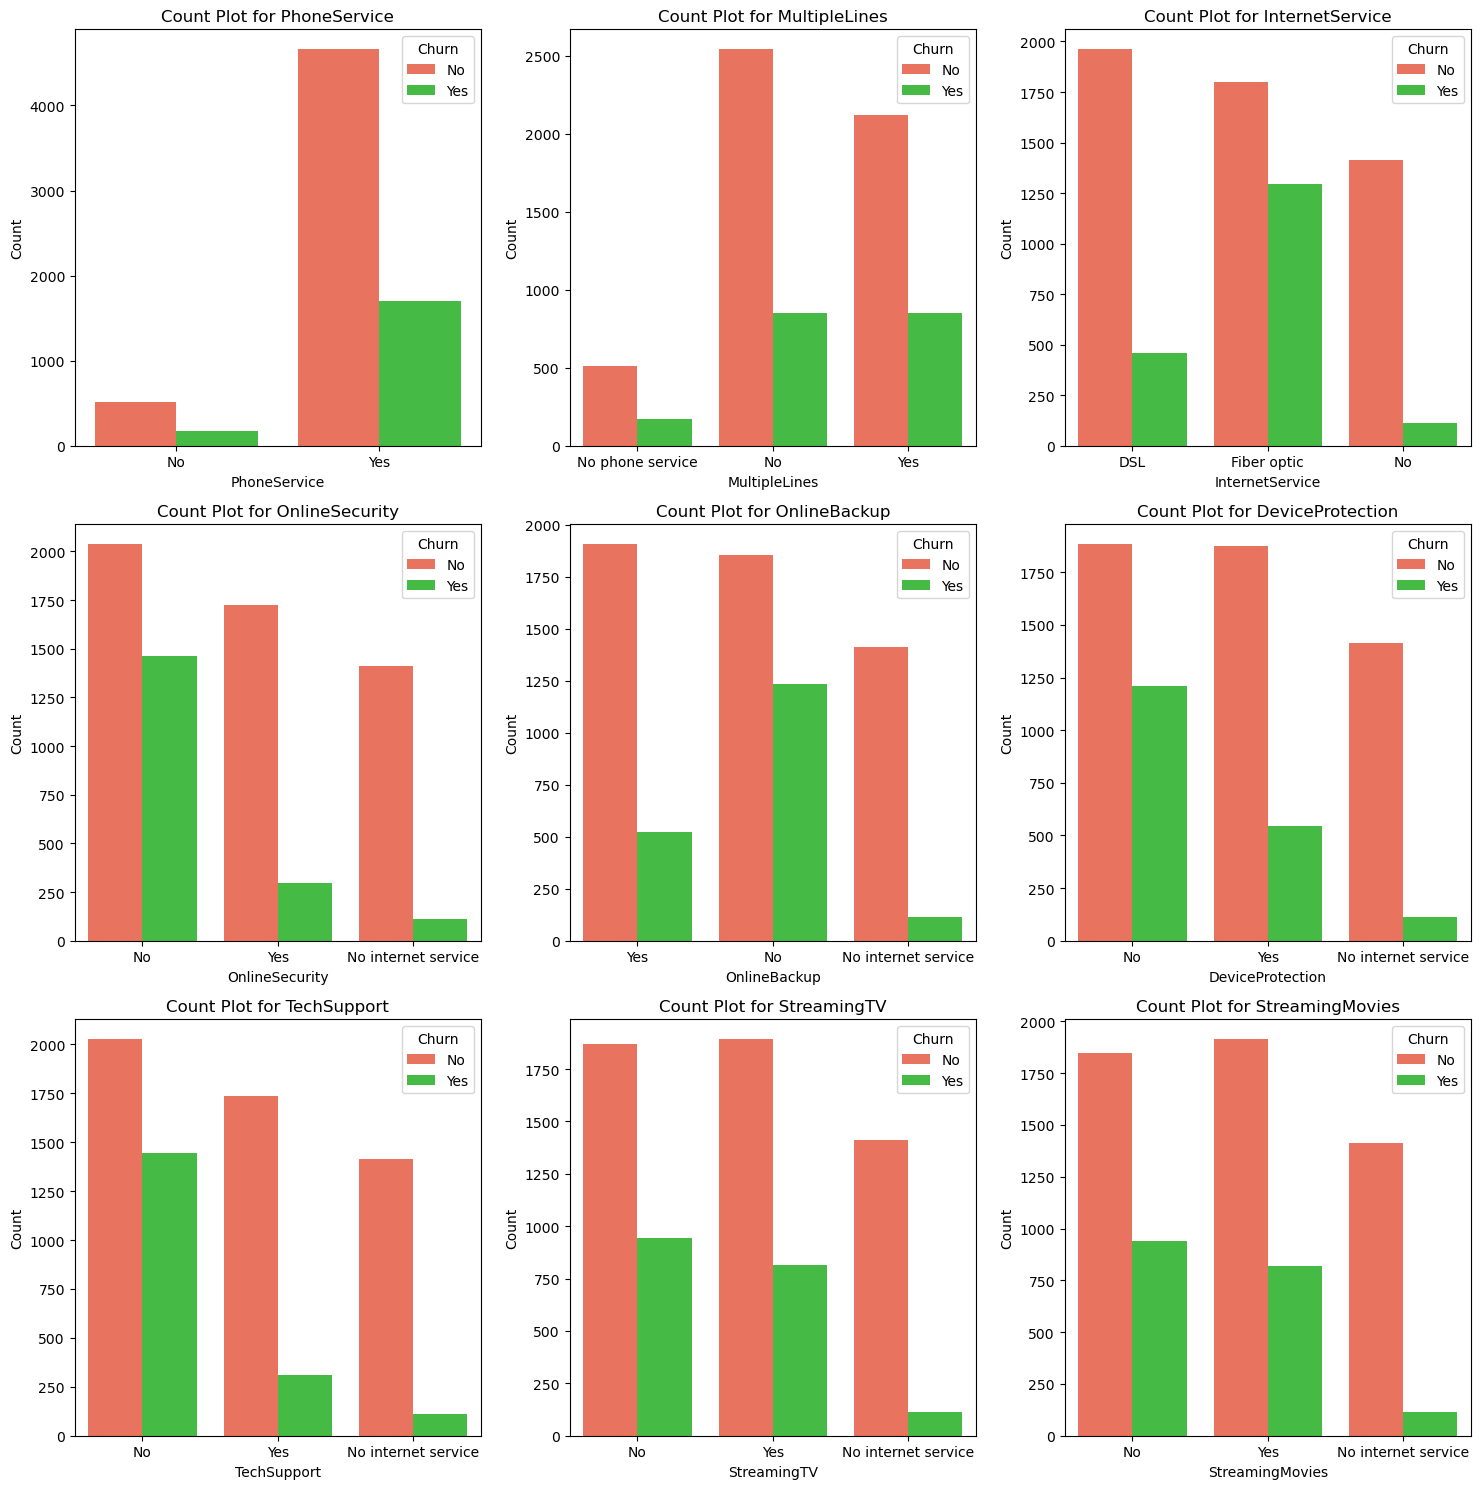

In [13]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(columns) // n_cols)  # Calculate the number of rows needed (ceil division)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the grid for easy indexing

# Create a count plot for each column
for i, column in enumerate(columns):
    sns.countplot(data=data, x=column, ax=axes[i],hue='Churn',palette=['#FF6347', '#32CD32'])
    axes[i].set_title(f'Count Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The Majority of Customers Who do not Churn tend to have services like PhoneService , InternetService(DSL)), and OnlineSecurity enabled. For Service like OnlineBackup , TechSupport andd StreamingTV , churn rate are noticeably higher when these services are not used or are unavaliable

# Churn Count By Payment Method

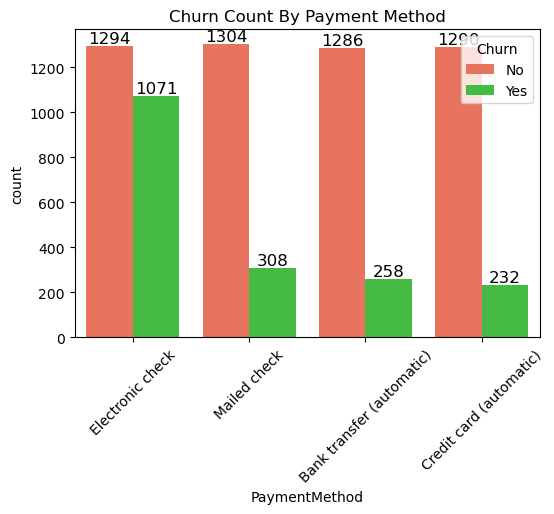

In [14]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod',data=data,hue="Churn", palette=['#FF6347', '#32CD32'])
for p in ax.patches:
    count = int(p.get_height())  
    ax.annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.title("Churn Count By Payment Method")
plt.xticks(rotation=45)
plt.show()

customer is likely to churn wnen he is use Electronic Check as a payment Method

# Churn By Gender

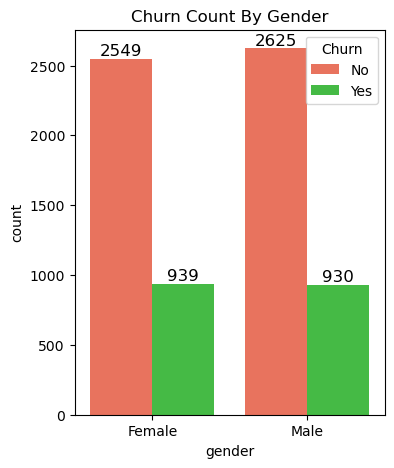

In [15]:
plt.figure(figsize=(4,5))
ax=sns.countplot(x='gender',data=data,hue="Churn", palette=['#FF6347', '#32CD32'])
for p in ax.patches:
    count = int(p.get_height())  
    ax.annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.title("Churn Count By Gender")
plt.show()

There is no diffrence between male or female for churn.

# Prediction For Churn

In [16]:
# for prediction convert all categorical values into numerical values 
# Encoding Data and store into newdata

NewData = pd.DataFrame()

NewData['Gender_Male1_Female0'] = data['gender'].map({"Male":1,"Female":0})

NewData["Partner_Yes1_No0"] = data["Partner"].map({"Yes":1,"No":0})

NewData["SeniorCitizen_Yes1_No0"] = data["SeniorCitizen"].map({"Yes":1,"No":0})

NewData["Dependents_Yes1_No0"] = data["Dependents"].map({"Yes":1,"No":0})

NewData["PhoneService_Yes1_No0"] = data["PhoneService"].map({"Yes":1,"No":0})

NewData["MultipleLines_Yes1_No0_Nophoneservice2"] = data["MultipleLines"].map({"Yes":1,"No":0,"No phone service":2})

NewData["OnlineSecurity_Yes1_No0_Nointernetservice2"] = data["OnlineSecurity"].map({"Yes":1,"No":0,"No internet service":2})

NewData["OnlineBackup_Yes1_No0_Nointernetservice2"] = data["OnlineBackup"].map({"Yes":1,"No":0,"No internet service":2})

NewData["DeviceProtection_Yes1_No0_Nointernetservice2"] = data["DeviceProtection"].map({"Yes":1,"No":0,"No internet service":2})

NewData["TechSupport_Yes1_No0_Nointernetservice2"] = data["TechSupport"].map({"Yes":1,"No":0,"No internet service":2})

NewData["StreamingTV_Yes1_No0_Nointernetservice2"] = data["StreamingTV"].map({"Yes":1,"No":0,"No internet service":2})

NewData["StreamingMovies_Yes1_No0_Nointernetservice2"] = data["StreamingMovies"].map({"Yes":1,"No":0,"No internet service":2})

NewData["Tenure"] = data["tenure"]

NewData["InternetService_Fiberoptic1_DSL2_No0"] = data["InternetService"].map({"Fiber optic":1,"No":0,"DSL":2})

NewData["Contract_Oneyear1_Monthtomonth0_Twoyear2"] = data["Contract"].map({"Month-to-month":0,"One year":1,"Two year":2})

NewData["PaperlessBilling_Yes1_No0"] = data["PaperlessBilling"].map({"Yes":1,"No":0})

NewData["PaymentMethod_EC1_MC2_BTA3_CCA4"] = data["PaymentMethod"].map({"Electronic check":1,"Mailed check":2,"Bank transfer (automatic)":3,"Credit card (automatic)":4})

NewData["MonthlyCharges"] = data["MonthlyCharges"]

NewData["TotalCharges"] = data['TotalCharges']

NewData["Churn_Yes1_No0"] = data["Churn"].map({"Yes":1,"No":0})


In [17]:
NewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gender_Male1_Female0                          7043 non-null   int64  
 1   Partner_Yes1_No0                              7043 non-null   int64  
 2   SeniorCitizen_Yes1_No0                        7043 non-null   int64  
 3   Dependents_Yes1_No0                           7043 non-null   int64  
 4   PhoneService_Yes1_No0                         7043 non-null   int64  
 5   MultipleLines_Yes1_No0_Nophoneservice2        7043 non-null   int64  
 6   OnlineSecurity_Yes1_No0_Nointernetservice2    7043 non-null   int64  
 7   OnlineBackup_Yes1_No0_Nointernetservice2      7043 non-null   int64  
 8   DeviceProtection_Yes1_No0_Nointernetservice2  7043 non-null   int64  
 9   TechSupport_Yes1_No0_Nointernetservice2       7043 non-null   i

In [18]:
# Check For Duplicate
NewData.duplicated().sum()

22

In [19]:
# Drop Duplicate
NewData.drop_duplicates(inplace=True)

In [20]:
# Selection of dependent and independent columns
X = NewData.drop(columns=['Churn_Yes1_No0','MonthlyCharges', 'TotalCharges']) 
y = NewData['Churn_Yes1_No0']

# Split into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [21]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Precision (Positive class is assumed to be 1)
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision*100}")

# Recall (Positive class is assumed to be 1)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall*100}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1*100}")


Accuracy: 78.932384341637
Precision: 58.80503144654088
Recall: 53.125
F1-Score: 55.82089552238806


I Was also perform feature selection(Forward & Backward Elimination) to get better Accuracy but I don't get Better Accuracy

In [23]:
# For Single record Prediction

gender = int(input("Gender_Male1_Female0 :"))
partner = int(input("Partner_Yes1_No0 :"))
SeniorCitizen = int(input("SeniorCitizen_Yes1_No0 :"))
Dependents = int(input("Dependents_Yes1_No0 :"))
PhoneService = int(input("PhoneService_Yes1_No0 :"))
MultipleLines = int(input("MultipleLines_Yes1_No0_Nophoneservice2 :"))
OnlineSecurity = int(input("OnlineSecurity_Yes1_No0_Nointernetservice2 :"))
OnlineBackup = int(input("OnlineBackup_Yes1_No0_Nointernetservice2 :"))
DeviceProtection = int(input("DeviceProtection_Yes1_No0_Nointernetservice2 :"))
TechSupport = int(input("TechSupport_Yes1_No0_Nointernetservice2 :"))
StreamingTV = int(input("StreamingTV_Yes1_No0_Nointernetservice2 :"))
StreamingMovies = int(input("StreamingMovies_Yes1_No0_Nointernetservice2 :"))
Tenure = int(input("Tenure (Months) :"))
InternetService = int(input("InternetService_Fiberoptic1_DSL2_No0 :"))
Contract = int(input("Contract_Oneyear1_Monthtomonth0_Twoyear2 :"))
PaperlessBilling = int(input("PaperlessBilling_Yes1_No0 :"))
PaymentMethod = int(input("PaymentMethod_EC1_MC2_BTA3_CCA4 :"))

data = [[gender,partner,SeniorCitizen,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure,InternetService,Contract,PaperlessBilling,PaymentMethod]]
test_data = pd.DataFrame(data,columns=model.feature_names_in_)
Churn = model.predict(test_data)
print("\nChurn :","Yes" if Churn else "No")

Gender_Male1_Female0 :1
Partner_Yes1_No0 :1
SeniorCitizen_Yes1_No0 :1
Dependents_Yes1_No0 :0
PhoneService_Yes1_No0 :0
MultipleLines_Yes1_No0_Nophoneservice2 :0
OnlineSecurity_Yes1_No0_Nointernetservice2 :0
OnlineBackup_Yes1_No0_Nointernetservice2 :0
DeviceProtection_Yes1_No0_Nointernetservice2 :0
TechSupport_Yes1_No0_Nointernetservice2 :0
StreamingTV_Yes1_No0_Nointernetservice2 :0
StreamingMovies_Yes1_No0_Nointernetservice2 :0
Tenure (Months) :2
InternetService_Fiberoptic1_DSL2_No0 :1
Contract_Oneyear1_Monthtomonth0_Twoyear2 :0
PaperlessBilling_Yes1_No0 :1
PaymentMethod_EC1_MC2_BTA3_CCA4 :1

Churn : Yes
